# South Africa Crime Statistics Analysis (2011–2023)

This project analyses reported crime statistics in South Africa from 2011 to 2023, with the aim of identifying national and provincial crime trends, major crime categories, and shifts over time. The goal is to gain actionable insights into crime patterns and make data-driven suggestions to improve safety and resource allocation.

---

**Tools used:**
- Python (Pandas, Matplotlib, Seaborn)
- Jupyter Notebook

**Dataset:**
- Source: Kaggle - “Crime Stats of South Africa 2011–2023”


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv("C:\\Users\\AMOGE\\crime_incidents_by_category.csv")
df.head()


,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724
2,ZA,Contact Crimes,2013/2014,611574
3,ZA,Contact Crimes,2014/2015,616973
4,ZA,Contact Crimes,2015/2016,623223


In [8]:

df.shape
df.columns
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Geography       840 non-null    object
 1   Crime Category  840 non-null    object
 2   Financial Year  840 non-null    object
 3   Count           840 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 26.4+ KB


,Geography,Crime Category,Financial Year,Count
count,840,840,840,840.000000
unique,10,7,12,NaN
top,ZA,Contact Crimes,2011/2012,NaN
freq,84,120,70,NaN
mean,NaN,NaN,NaN,61766.336905
std,NaN,NaN,NaN,111240.587975
min,NaN,NaN,NaN,377.000000
25%,NaN,NaN,NaN,8083.000000
50%,NaN,NaN,NaN,24581.500000
75%,NaN,NaN,NaN,63066.750000


## Dataset Summary

The dataset contains **840 rows** and **4 columns**, covering reported crime statistics in South Africa by province, crime category, and financial year from **2011/2012 to 2022/2023**.

- **Number of rows:** 840  
- **Number of columns:** 4  

### Key Columns:
- `Geography` – Province (e.g., Gauteng, Western Cape, etc.)  
- `Crime Category` – Type of crime (e.g., Contact Crimes, Property-Related Crimes)  
- `Financial Year` – The financial year in which the crimes were reported (e.g., "2011/2012")  
- `Count` – Number of reported crimes

### Overview:
- There are **10 unique geography entries** (likely 9 provinces + ZA for national total).
- **7 crime categories** are covered.
- **12 financial years** from **2011/2012 to 2022/2023**.
- Crime counts range from **377** to **653,659** reported incidents per record.

The data is clean with no missing values or null entries, making it ready for analysis.

In [16]:
# Renaming columns for clarity and ease of use
df.rename(columns={
    'Geography': 'Province',
    'Crime Category': 'Crime_Type',
    'Financial Year': 'Year',
    'Count': 'Count'
}, inplace=True)

# Checking unique values in Province
print("Unique provinces:")
print(df['Province'].unique())

# Removing "ZA" national total because I want only provincial-level data
df = df[df['Province'] != 'ZA']

df.head()


Unique provinces:
['EC' 'FS' 'GT' 'KZN' 'LIM' 'MP' 'NW' 'NC' 'WC']


,Province,Crime_Type,Year,Count
10,EC,Contact Crimes,2011,75779
11,EC,Contact Crimes,2012,72650
12,EC,Contact Crimes,2013,73032
13,EC,Contact Crimes,2014,68654
14,EC,Contact Crimes,2015,67258


## Data Cleaning

To prepare the data for analysis, several cleaning steps were taken:

- The original column names were renamed for ease of use in Python:
  - `Geography` → `Province`
  - `Crime Category` → `Crime_Type`
  - `Financial Year` → `Year`
  - `Count` remained unchanged

- The dataset included a `"ZA"` row in the `Province` column representing **national totals**. This row was removed so the analysis could focus purely on **province-level data**.

- After filtering, there are now **9 provinces** represented in the dataset:
  `['EC', 'FS', 'GT', 'KZN', 'LIM', 'MP', 'NW', 'NC', 'WC']`
  which correspond to:
  - EC: Eastern Cape
  - FS: Free State
  - GT: Gauteng
  - KZN: KwaZulu-Natal
  - LIM: Limpopo
  - MP: Mpumalanga
  - NW: North West
  - NC: Northern Cape
  - WC: Western Cape

- The `Year` values are still in the `"YYYY/YYYY"` format at this point, which will be cleaned in the next step to a single 4-digit year (e.g. `"2011"`).



In [29]:
df['Year'] = df['Year'].astype(str).str.slice(0, 4).astype(int)

print(df['Year'].head())


10    2011
11    2012
12    2013
13    2014
14    2015
Name: Year, dtype: int32


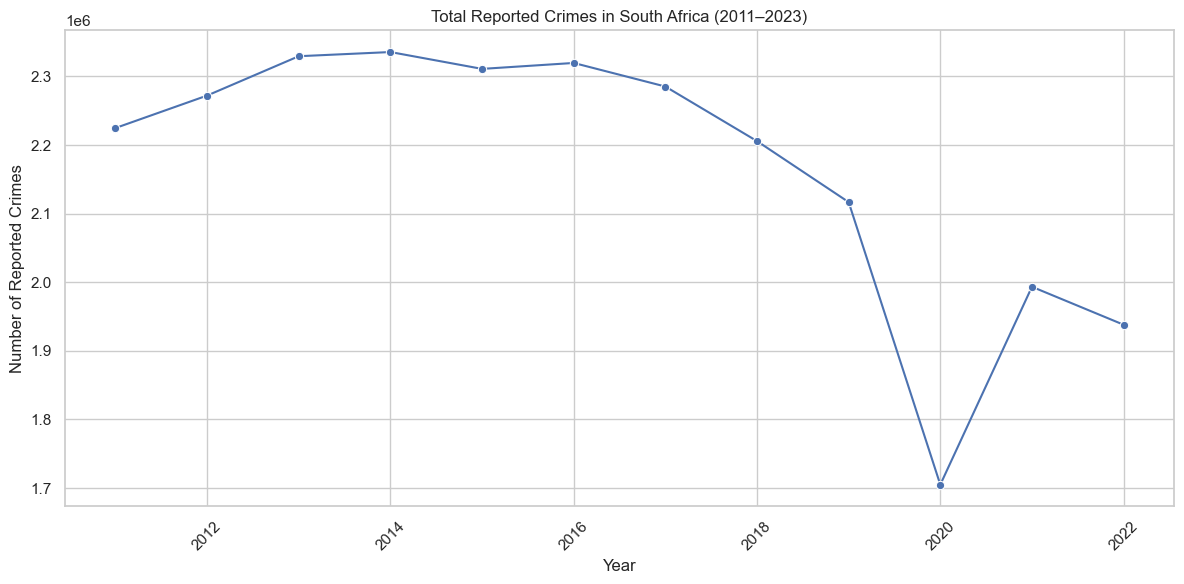

    Year    Count
0   2011  2224792
1   2012  2272111
2   2013  2329449
3   2014  2335528
4   2015  2310974
5   2016  2319617
6   2017  2285253
7   2018  2205723
8   2019  2116778
9   2020  1704947
10  2021  1993407
11  2022  1938089


In [31]:

national_trend = df.groupby('Year')['Count'].sum().reset_index()

# Plotting the total crimes over the years

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=national_trend, x='Year', y='Count', marker='o')
plt.title('Total Reported Crimes in South Africa (2011–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Reported Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(national_trend)


## National Crime Trends (2011–2023)

The total reported crimes in South Africa fluctuated from 2011 to 2023, with a notable peak and drop during this period.

- The **highest year** was **2014**, with **2,335,528** reported crimes.  
- The **lowest year** was **2020**, with **1,704,947** reported crimes.

The data shows a generally fluctuating trend, with crime counts hovering around 2.2 to 2.3 million annually before 2019. There is a **sharp decline in 2020**, which is likely attributable to the COVID-19 lockdowns that restricted movement and social interactions, temporarily reducing crime levels.

Crime numbers rebounded somewhat after 2020 but remained below pre-2020 levels as of 2022, possibly reflecting ongoing social changes or continued restrictions.


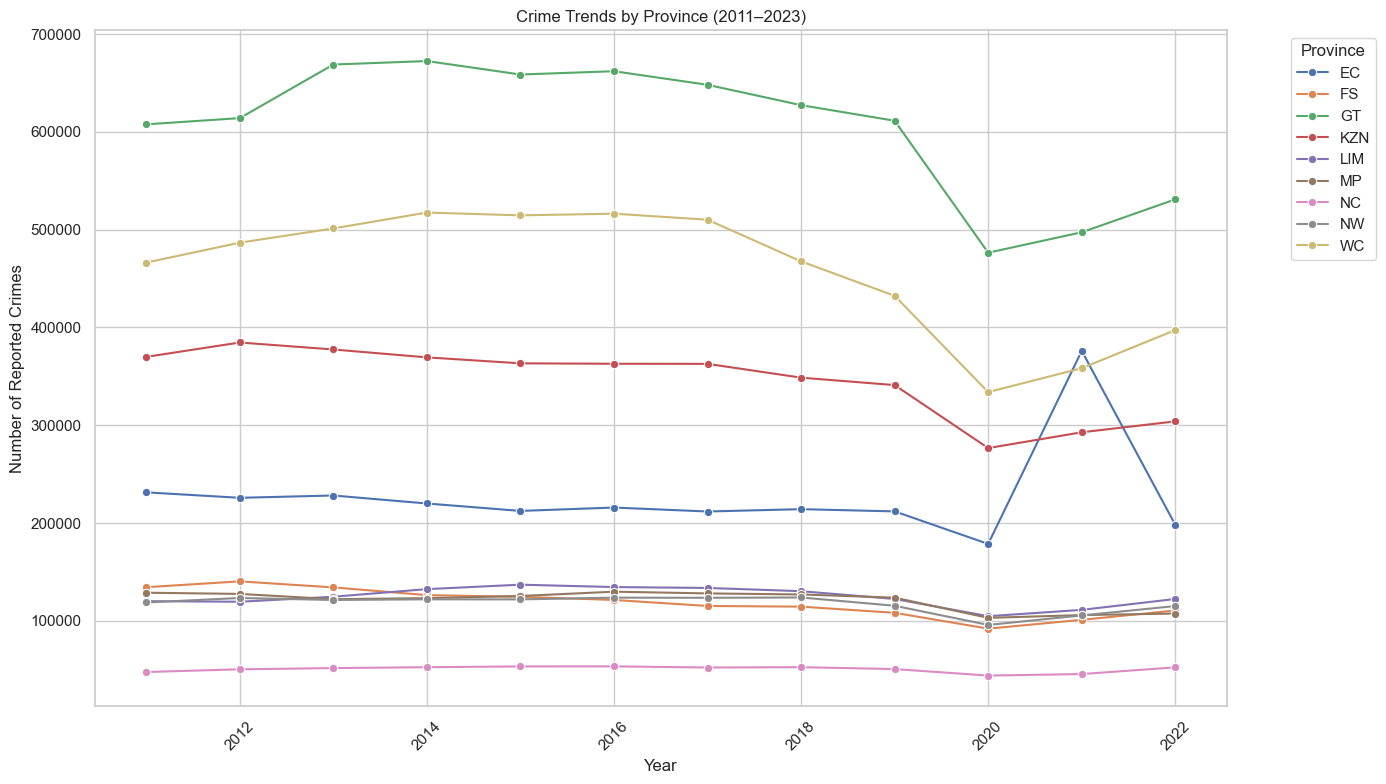

In [34]:
# Aggregate total crimes by Province and Year
province_trends = df.groupby(['Province', 'Year'])['Count'].sum().reset_index()

# Plot crime trends by province
plt.figure(figsize=(14, 8))
sns.lineplot(data=province_trends, x='Year', y='Count', hue='Province', marker='o')
plt.title('Crime Trends by Province (2011–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Reported Crimes')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
# Sum crime counts across all years per province
total_crime_province = df.groupby('Province')['Count'].sum().sort_values(ascending=False).reset_index()

print(total_crime_province)


  Province    Count
0       GT  7274899
1       WC  5502038
2      KZN  4153161
3       EC  2723932
4      LIM  1492403
5       MP  1451499
6       FS  1422327
7       NW  1410042
8       NC   606367


## Province-Level Crime Trends (2011–2023)

This section analyzes how reported crimes varied across South Africa’s provinces over time.

### Total Crime by Province (2011–2023):

The total number of reported crimes per province over the entire period:

| Province | Total Crime Count |
|----------|-------------------|
| GT (Gauteng) | 7,274,899 |
| WC (Western Cape) | 5,502,038 |
| KZN (KwaZulu-Natal) | 4,153,161 |
| EC (Eastern Cape) | 2,723,932 |
| LIM (Limpopo) | 1,492,403 |
| MP (Mpumalanga) | 1,451,499 |
| FS (Free State) | 1,422,327 |
| NW (North West) | 1,410,042 |
| NC (Northern Cape) | 606,367 |

### Observations:

- **Gauteng (GT)** had the **highest total crime** count by a significant margin, peaking near **700,000** in certain years.
- **Western Cape (WC)** and **KwaZulu-Natal (KZN)** also consistently had high crime counts.
- **Northern Cape (NC)** had the **lowest crime count** and showed the flattest trend line, staying well below 100,000 annually.
- The four lowest-crime provinces - **Limpopo (LIM)**, **Mpumalanga (MP)**, **Free State (FS)**, and **North West (NW)** - had almost **identical trend patterns**, closely overlapping in the line plot.

### Notable Trends:

- **2020** showed a significant drop in reported crimes across **all provinces**, likely due to national lockdowns during the COVID-19 pandemic.
- **Eastern Cape (EC)** had an unusual spike in 2021, reaching its **highest crime level** in the full dataset, before returning to its usual range in 2022.
- **Western Cape (WC)**'s trend closely followed Gauteng


                                     Crime_Type    Count
0                                Contact Crimes  7320647
1                       Property Related Crimes  5866331
2                          Other Serious Crimes  5498899
3  Crimes Detected as a Result of Police Action  3877421
4                        Contact Related Crimes  1428725
5                          Aggravated Robberies  1402749
6                               Sexual Offences   641896


C:\Users\AMOGE\AppData\Local\Temp\ipykernel_13216\340146320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_totals, x='Count', y='Crime_Type', palette='viridis')


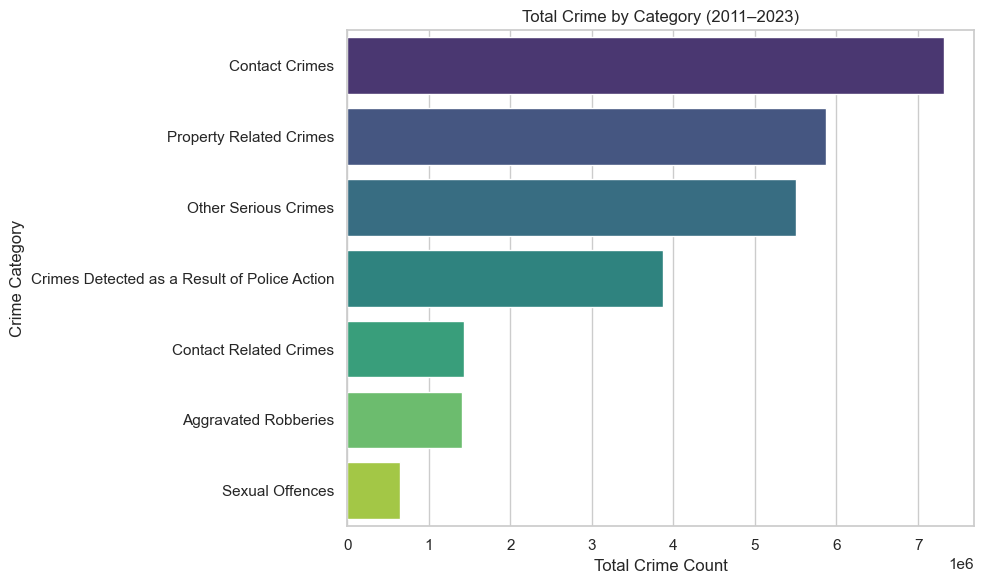

In [40]:
# Total crime count by crime type
crime_totals = df.groupby('Crime_Type')['Count'].sum().sort_values(ascending=False).reset_index()

# View totals
print(crime_totals)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=crime_totals, x='Count', y='Crime_Type', palette='viridis')
plt.title('Total Crime by Category (2011–2023)')
plt.xlabel('Total Crime Count')
plt.ylabel('Crime Category')
plt.tight_layout()
plt.show()


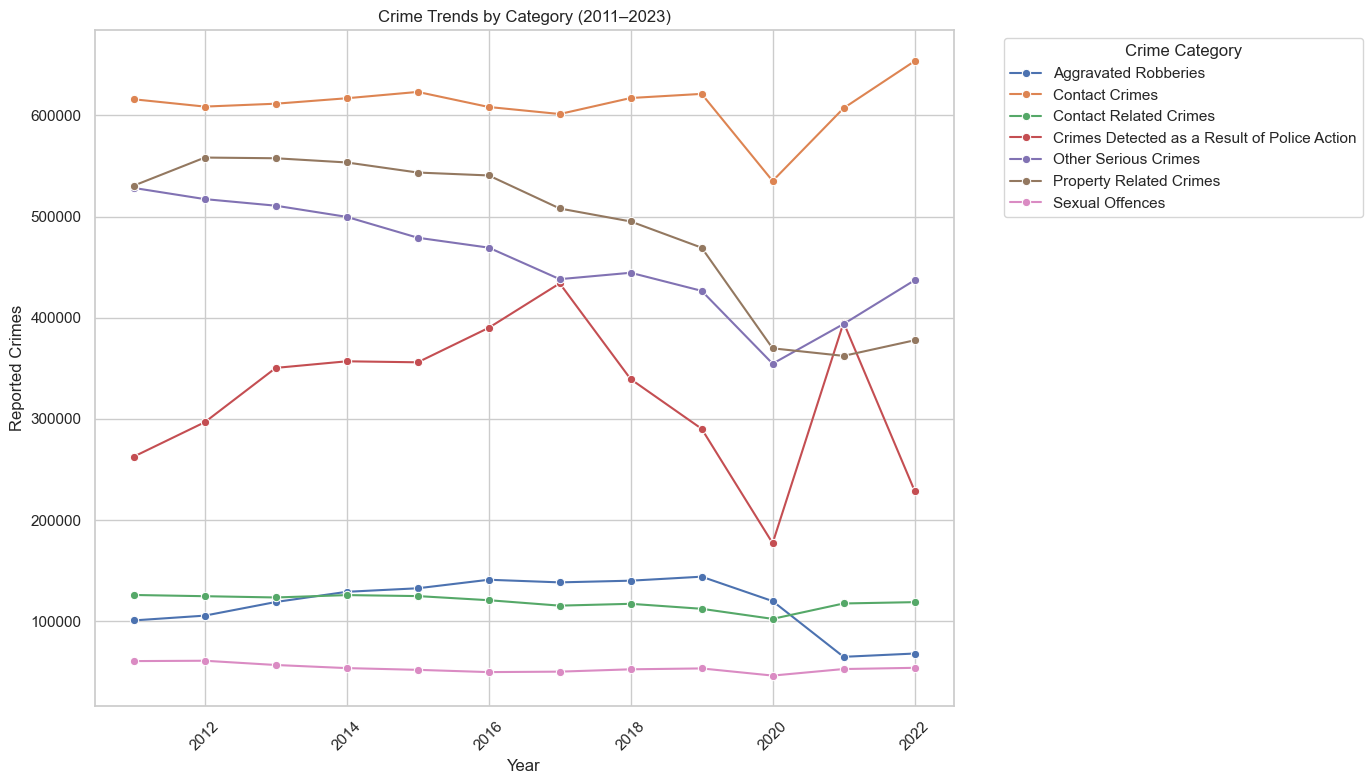

In [42]:
# Group by year and crime type
crime_trend = df.groupby(['Year', 'Crime_Type'])['Count'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=crime_trend, x='Year', y='Count', hue='Crime_Type', marker='o')
plt.title('Crime Trends by Category (2011–2023)')
plt.xlabel('Year')
plt.ylabel('Reported Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Crime Category Analysis (2011–2023)

This section explores how different types of crimes contributed to South Africa’s overall crime levels from 2011 to 2023.

### Total Crime by Category:

A bar chart of total reported crimes by category shows the following:

- **Contact Crimes** (e.g. assault, murder) had the **highest overall count**, making them the most prevalent category nationwide.
- **Sexual Offences** had the **lowest overall count** among the tracked categories.

Other major categories include:
- **Property-Related Crimes**
- **Contact-Related Crimes**
- **Other Serious Crimes**
- **Aggravated Robberies**
- **Crimes Detected as a Result of Police Action**

### Trends Over Time:

- All categories showed a significant **drop in 2020**, likely due to strict lockdown measures during the COVID-19 pandemic.
- **Aggravated Robberies** showed a **declining trend** year by year up to 2020, followed by a rebound afterward.
- **Crimes Detected as a Result of Police Action** had a sharp **increase after 2020**, possibly indicating a targeted post-lockdown enforcement push. However, it **fell again in 2022**.
- **Sexual Offences**, despite being the least common, followed a similar overall shape to other categories but remained consistently low in volume.

These patterns help reveal which crime types are persistent problems, which ones respond to social conditions, and which may be affected by policy or policing strategies.


## 🧾 Summary & Recommendations

### Summary:

This analysis explored South African crime data from 2011 to 2023, using real-world data disaggregated by province, crime type, and year.

Key findings:

- **Crime peaked in 2014** and dropped sharply in **2020** during the COVID-19 lockdown.
- **Gauteng**, **Western Cape**, and **KwaZulu-Natal** were the highest-crime provinces, with **Northern Cape** consistently having the lowest.
- **Contact Crimes** were the most common across the country.
- All categories dropped in 2020, but some - like **Crimes Detected via Police Action** - spiked afterward, showing changes in law enforcement focus.
- Certain provinces, like **Eastern Cape**, experienced unusual spikes post-2020 that may require local investigation.

---

### Recommendations:

1. **Target High-Burden Provinces**: Focus resources and crime-prevention programs on Gauteng, Western Cape, and KZN, especially in urban hotspots.

2. **Reinforce Community Policing**: The 2020 drop suggests that mobility and visibility matter. Reinvesting in community patrols and curfews during peak crime periods could reduce certain crimes.

3. **Monitor Police Action Crimes**: Spikes in post-lockdown police activity raise questions about enforcement intensity. Further review could help balance crime control with community trust.

4. **Investigate EC's 2021 Spike**: The unusual rise in Eastern Cape's 2021 crime rate may reflect reporting issues, enforcement patterns, or local unrest; further local context is needed.

5. **Sustain Public Reporting Systems**: Ensuring public trust in crime reporting helps keep data complete and reliable for ongoing monitoring and policymaking.


